# Effect of sample size

In [1]:
using BSON
using PrettyTables
using Statistics
using DataFrames
using Plots
using KernelDensity

function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)
    est = out["beta_hat"];
    fit = out["fitness"]
    if verbose==true
        for i = 1:size(est)[1]
            println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
            sleep(0.1)
        end
    end
    bw = out["bw"]

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
    m_h = mean(bw, dims=1)

    pars10 = ["b11u", "b12u", "b21u", "b22u", "b11d", "b12d", "b21d", "b13u", "b33d", "eqsel", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10);
    return est_df, bias, MSE, m_h 
end

formatter = (v, i, j) -> round(v, digits = 2);

In [448]:

function fetch_res(N,S,path)
    res=BSON.load(path)
    est= reduce(hcat,res["beta_hat"]')
    # println(est)
    best_est= zeros(100, 3) 

    for i =1:100
        best_est[i, :]=  est[:,i]
    end
    best_est = DataFrame(best_est, ["b33d", "eqsel", "fit"]);
    return best_est
end


function fetch_res2(N,S,path)
    res=BSON.load(path)
    est= reduce(vcat,res["beta_hat"])
    # println(est)
    best_est = DataFrame(est, ["b33d", "eqsel", "fit"]);
    return best_est
end


# pretty_table(best_est, formatters = formatter, show_row_number=true) # displaying 10 estimations

fetch_res2 (generic function with 1 method)

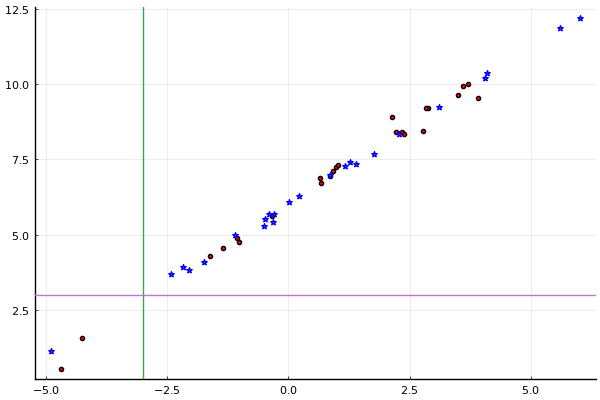

In [353]:
path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_25_sim_25_dmod_1"

pl = scatter(fetch_res2(25,25,path)[:,1],fetch_res2(25,25,path)[:,2], markersize =3,legends=false, markerstrokecolor=:black, color=:red, )
# path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_50_sim_25_dmod_2"
path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_25_sim_25_dmod_3_1_1_1"

pl = scatter!(fetch_res2(25,25,path)[:,1],fetch_res2(50,25,path)[:,2], markersize =4,legends=false,markerstrokecolor=:blue , markershape=:star)

    vline!([-3.])
    hline!([3.])


# fetch_res2(25,25,path)

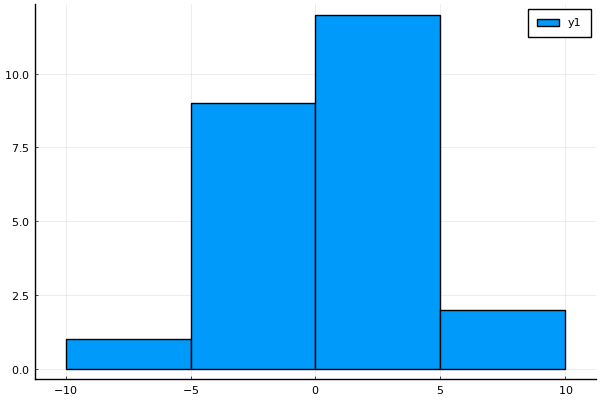

In [404]:
N=200
path1="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_1_01_01_1"

p1 = scatter(fetch_res2(25,25,path1)[:,1],fetch_res2(25,25,path1)[:,2], markersize =5,legends=false, markerstrokecolor=:black, color=:red ,title="Price")
    vline!([-3.])
    hline!([3.])
# path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_50_sim_25_dmod_2"
path2="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_3_01_01_1"

p2 = scatter(fetch_res2(25,25,path2)[:,1],fetch_res2(50,25,path2)[:,2], markersize =5,legends=false,
    markerstrokecolor=:blue , markershape=:star,  title= "match and price",)

    vline!([-3.])
    hline!([3.])

p3 = scatter(fetch_res2(25,25,path1)[:,1],fetch_res2(25,25,path1)[:,2], markersize =3,legends=false, markerstrokecolor=:black, color=:red ,)
    vline!([-3.])
    hline!([3.])
scatter!(fetch_res2(25,25,path2)[:,1],fetch_res2(50,25,path2)[:,2], markersize =4,legends=false,
    markerstrokecolor=:blue , markershape=:star)


plot(p1, p2,p3 ,layout=(1,3), size = (2000,800), xlims= (-7,5), ylims = (-5,12))

histogram(fetch_res2(25,25,path2)[:,1])
fetch_res2(25,25,path1)[:,1]
# fetch_res2(25,25,path)

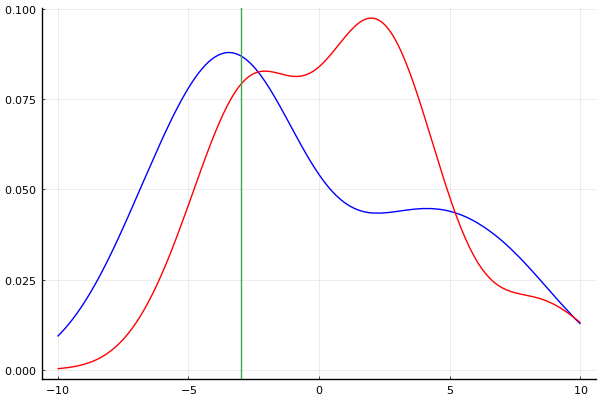

In [419]:
N=200

path1="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_1_01_01_1"
path2="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_3_01_01_1"

plot(x->pdf(kde(fetch_res2(25,25,path1)[:,1]), x), -10,10, color= :blue, legends=false)
plot!(x->pdf(kde(fetch_res2(25,25,path2)[:,1]), x), -10,10, color=:red)
vline!([-3.])


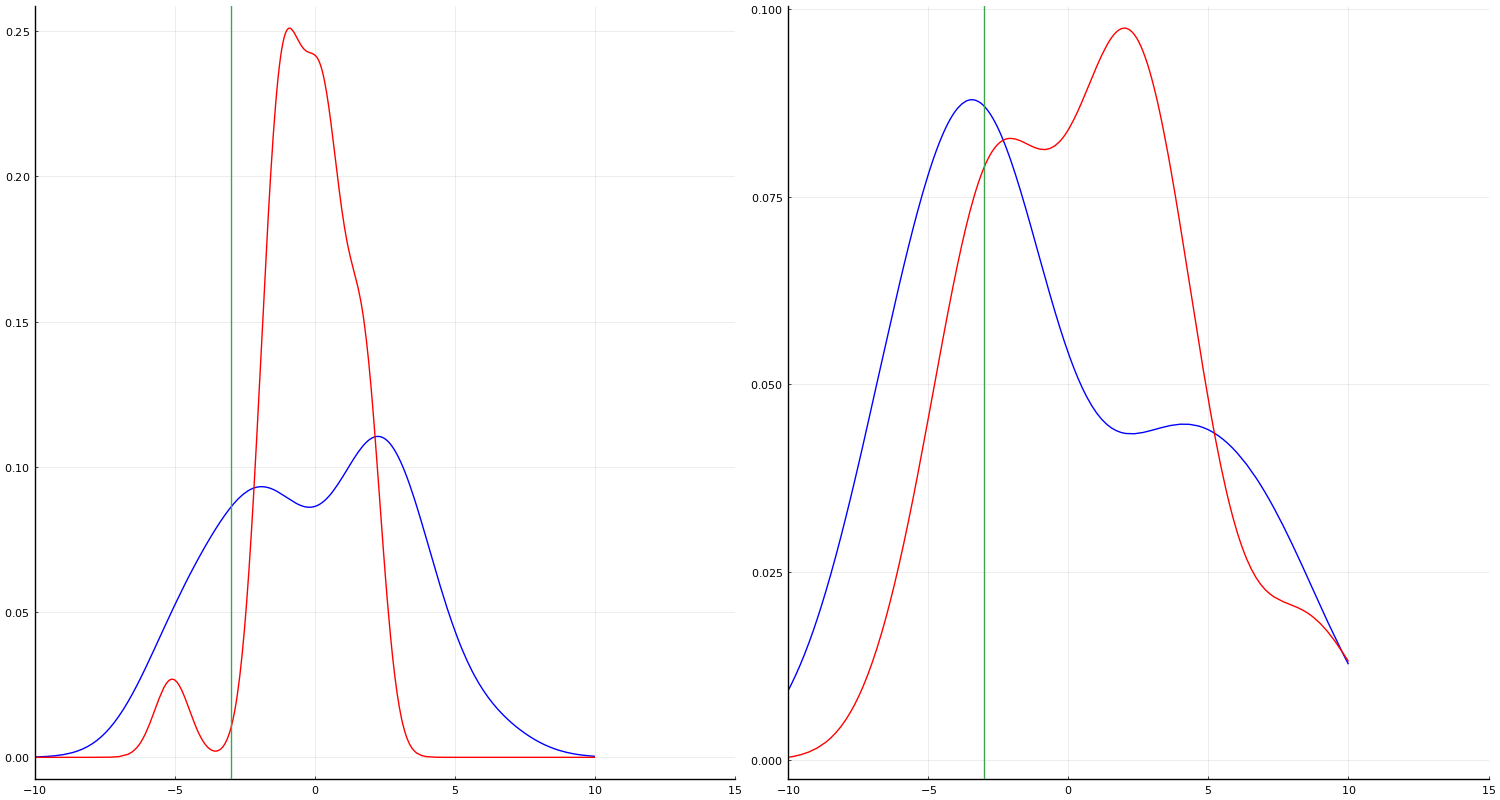

In [447]:


N=50
d = 1

path1="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_1_01_01_1"
path2="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_3_01_01_1"

p1 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)
plot!(x->pdf(kde(fetch_res2(25,25,path2)[:,d]), x), -10,10, color=:red)
vline!([-3.])

N=200

path1="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_1_01_01_1"
path2="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_$(N)_sim_25_dmod_3_01_01_1"

p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)
plot!(x->pdf(kde(fetch_res2(25,25,path2)[:,d]), x), -10,10, color=:red)
vline!([-3.])

plot(p1, p2 ,layout=(1,2), size = (1500,800), xlims= (-10,15))



In [329]:
path1 = "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_25_sim_25_dmod_1"
path2 = "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data/est_25_sim_25_dmod_2"
[fetch_res2(25,25,path1)[:,1] fetch_res2(25,25,path)[:,1]]

24×2 Matrix{Float64}:
  0.991389   0.989062
  0.917553  -1.04368
 -1.62543   -1.62905
  0.862129   0.856613
  3.60273    1.4948
  3.49204   -0.160765
  2.88687   -0.708775
  2.78196   -0.435755
  0.666161   0.652566
  1.02007   -0.400497
 -1.06034   -0.901289
  0.646599   0.411816
 -1.02056   -0.979213
 -1.36083   -0.53325
  3.70448   -1.86241
  2.3456    -0.0969925
  2.21443    0.949633
 -4.69329   -3.98946
 -4.27149    0.386438
  2.13629    6.59796
  2.84759   -3.94621
  2.391      2.25001
  3.9234    -0.91827
 -0.348297  -0.336001

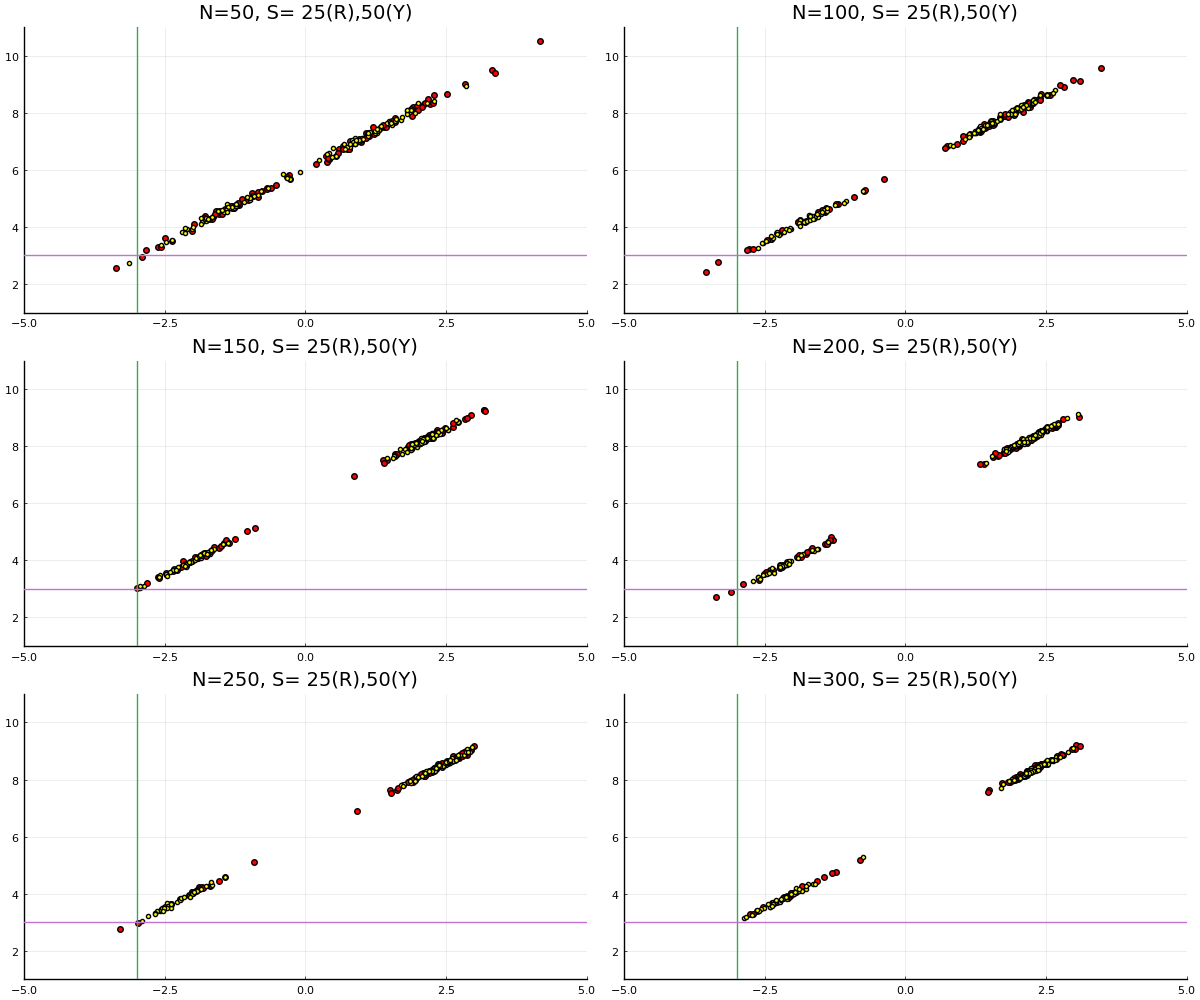

In [320]:
# N=50
# S=25
# path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
# p1= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =4,legends=false,color=:red, title="N=50, S= 25" )

# N=100
# S=25
# path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
# p2=scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =2,legends=false,color=:yellow, title="N=100, S= 25" )


p_vec = []
for N = 50:50:300
    S=25
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =4,legends=false,color=:red, title="N=$(N), S= 25(R),50(Y)" )
    S=50
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
    vline!([-3.])
    hline!([3.])
    push!(p_vec,pl )
end

plot(p_vec[1],p_vec[2],p_vec[3],p_vec[4],p_vec[5],p_vec[6], layout= (3,2), xlims = (-5,5), ylims = (1,11),size = (1200,1000))



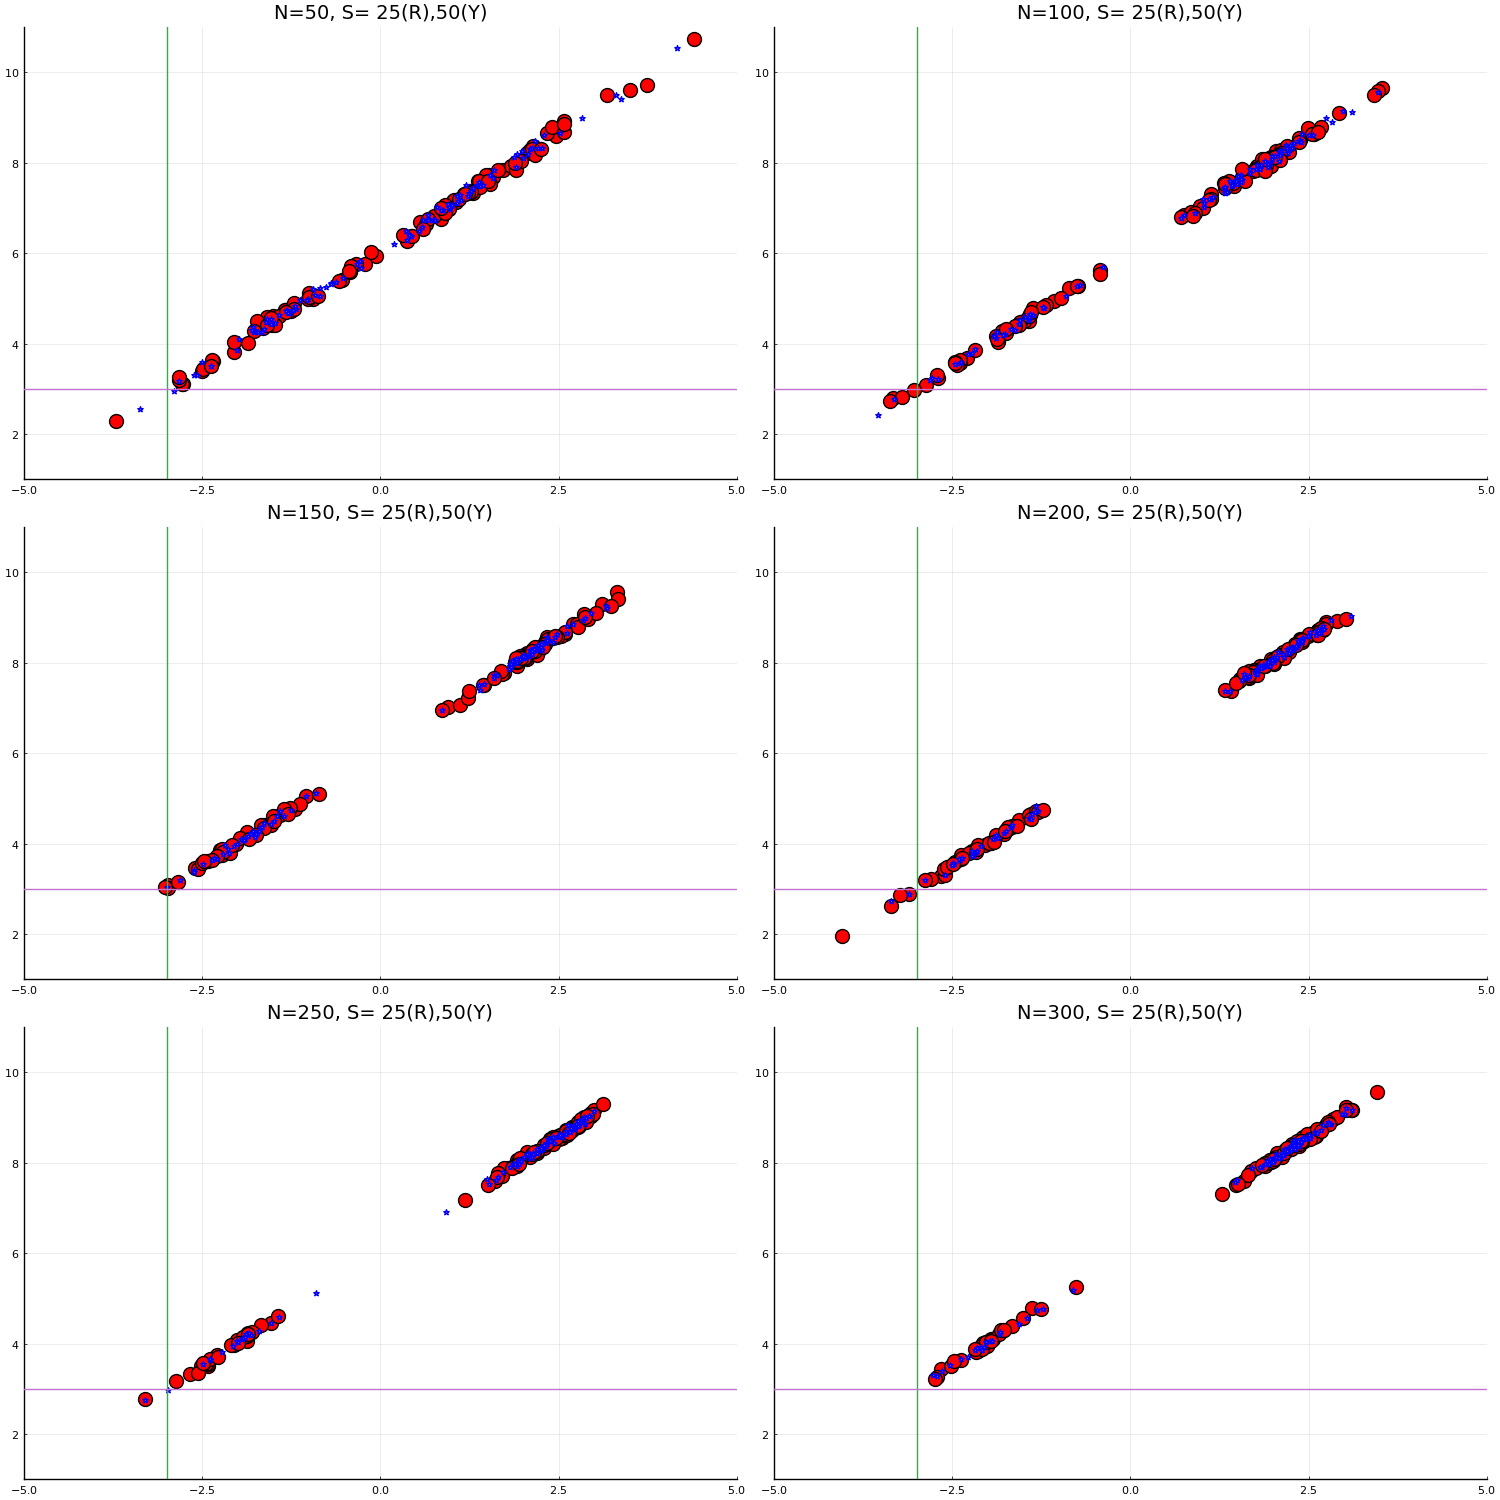

In [225]:
p_vec = []
for N = 50:50:300
    S=25
    path="/Users/amir/out/rest-2p_half_price/est_$(N)_sim_$(S)_9-10.bson"
    pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =10,legends=false,markerstrokecolor=:black, color=:red, title="N=$(N), S= 25(R),50(Y)" )
#     S=50
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =4,legends=false, markerstrokecolor=:blue , markershape=:star)
    push!(p_vec,pl )
    vline!([-3.])
    hline!([3.])
end

plot(p_vec[1],p_vec[2],p_vec[3],p_vec[4],p_vec[5],p_vec[6], layout= (3,2), xlims = (-5,5), ylims = (1,11), size=(1500,1500))



In [194]:
Pkg.add("PyPlot")

LoadError: UndefVarError: Pkg not defined

In [154]:
[fetch_res(100,25,"/Users/amir/out/rest-2p_half_price/est_$(N)_sim_$(S)_9-10.bson")[:,2] fetch_res(100,25,"/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson")[:,2]]


100×2 Matrix{Float64}:
 8.15514  8.90022
 8.11645  8.08651
 8.25323  7.85434
 8.28196  8.2911
 8.13551  7.72619
 7.99808  8.00763
 2.79072  2.78353
 7.4805   7.32319
 7.74901  7.71279
 2.819    4.79225
 8.23105  8.21973
 3.68749  4.6393
 3.57612  3.56605
 ⋮        
 6.89148  6.89522
 7.86672  7.94402
 5.27775  5.30803
 4.33263  4.17195
 8.4724   8.48445
 8.13483  7.64657
 7.81284  7.91387
 6.82446  7.98139
 3.56577  3.54006
 3.30587  3.20386
 8.0956   4.5187
 8.6902   8.46375

# MC Results NOTS

I consider a design with $N=100,300,500$, $S=50$, and $100$ replications. I vary the bandwidth for the characteristics of the equilibrium partner to half, equal, and $1.5$ times the baseline bandwidth selection rule.  The price bandwidth is equal to the baseline bandwidth in all MCs. 

For each sample size $N$ and the choice of bandwidth, I consider two different data scenarios. One where only prices are available and the second one where we have access to both the prices and the equilibrium matching. The case with prices alone can be thought of as the situation where the equilibrium transfer is disclosed but the characteristics of the equilibrium partner are not. 

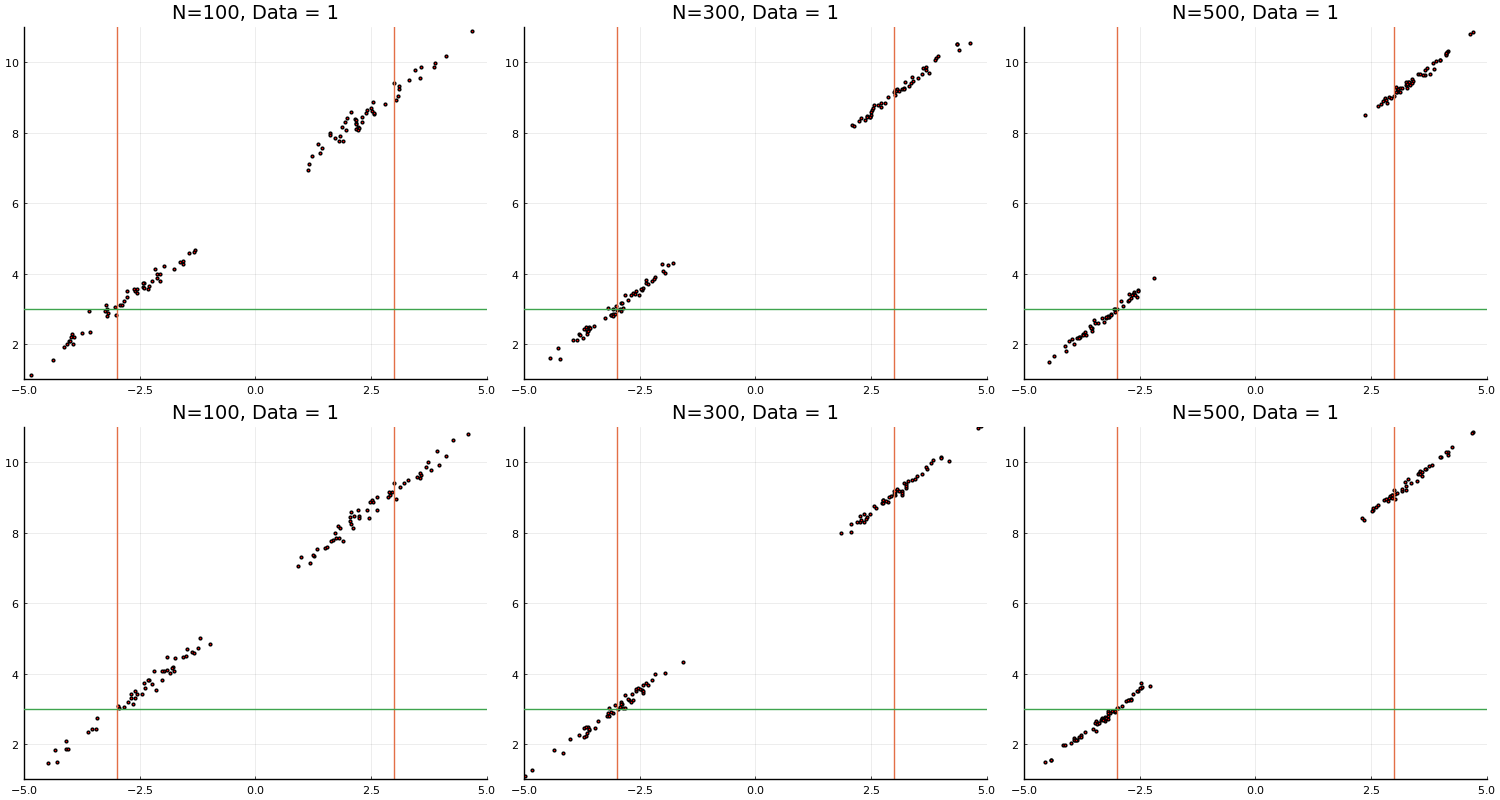

In [495]:
# N=100
# BW=1.5
# D=1
# path="/Users/amir/out/limited_data/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
# pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =4,legends=false,strokecolor=:red, title="N=$(N), S= 25(R),50(Y)" )
#     vline!([-3.])
#     hline!([3.])

#     vline!([3.])


BW=1.0
D=1
p_vec = []
for BW = 0.5:0.5:1.5
    for N = 100:200:500
        path="/Users/amir/out/limited_data/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =2,legends=false,color=:red, title="N=$(N), Data = $(D)" )
    #     S=50
    #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
        vline!([-3., 3.])
        hline!([3.])
        push!(p_vec,pl )
    end
end 

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6], layout= (2,3), xlims = (-5,5), ylims = (1,11),size = (1500,800))

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6], layout= (2,3), xlims = (-5,5), ylims = (1,11),size = (1500,800))




# Check couple of other things. including a parameter relating to matches



In [522]:
path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p//est_100_sim_50_dmode_3_bw_1.0.bson"
res=BSON.load(path)
est= reduce(vcat,res["beta_hat"])



24×4 Matrix{Float64}:
 -2.5475   -2.28692     3.76362   -0.978259
 -2.52874  -1.79614     4.19724   -1.17671
 -2.46658  -2.54565     3.39168   -1.19448
 -2.33094   2.54122     8.62335   -0.759994
 -2.32342   3.34987     9.4963    -1.12181
 -2.22049  -2.61683     3.51074   -1.28083
 -2.13639   3.38212     9.40057   -1.04347
 -2.62078  -2.85174     3.15991   -0.990738
 -2.24632  -5.80681     0.182195  -0.762599
 -1.93756   6.6167     12.7483    -0.438587
 -2.16193   6.57529    12.588     -0.815325
 -2.27635   2.47126     8.53577   -0.871919
 -2.57214   0.0298024   6.07387   -0.692238
 -2.25206  -5.04012     1.027     -0.466966
 -2.57844   5.23199    11.2965    -0.714143
 -2.1783    0.607643    6.65124   -1.06056
 -2.27541   0.611903    6.67997   -1.1962
 -2.84703  -1.02892     5.0435    -0.825984
 -2.42135   2.27006     8.32394   -1.37965
 -2.0508    2.08442     8.08018   -1.15854
 -2.11413   1.42022     7.54947   -1.02023
 -2.41958  -2.82137     3.12275   -1.30299
 -2.52976   8.33314   

In [542]:

function fetch_res3p(path)
    res=BSON.load(path)
    est= reduce(vcat,res["beta_hat"])
    best_est = DataFrame(est, ["b11u","b33d", "eqsel", "fit"]);
    return best_est
end

D=3
p_vec = []
for BW = 1.:5:1.
    for N in [50, 100, 200]
        path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p//est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(fetch_res3p(path)[:,3],fetch_res3p(path)[:,4], markersize =2,legends=false,color=:red, title="N=$(N), Data = $(D)" )
    #     S=50
    #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
#         vline!([-2.5])
#         hline!([-3])
        push!(p_vec,pl )
    end
end 


# Plotting $\beta_{11}^u$ versus the value of the log likelihood

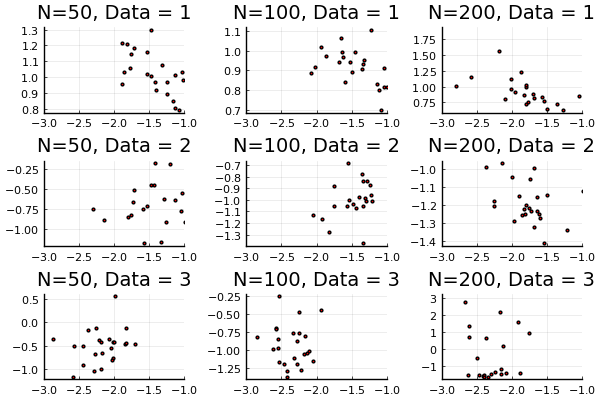

In [553]:

p_vec = []
for D = 1:1:3
    for N in [50, 100, 200]
        path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(fetch_res3p(path)[:,1],fetch_res3p(path)[:,4], markersize =2,legends=false,color=:red, title="N=$(N), Data = $(D)" )
    #     S=50
    #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
#         vline!([-2.5])
#         hline!([-3])
        push!(p_vec,pl )
    end
end 

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6],p_vec[7], p_vec[8], p_vec[9] , xlims = (-3,-1), layout= (3,3))
# , xlims = (-5,5), ylims = (1,11),size = (1500,800))




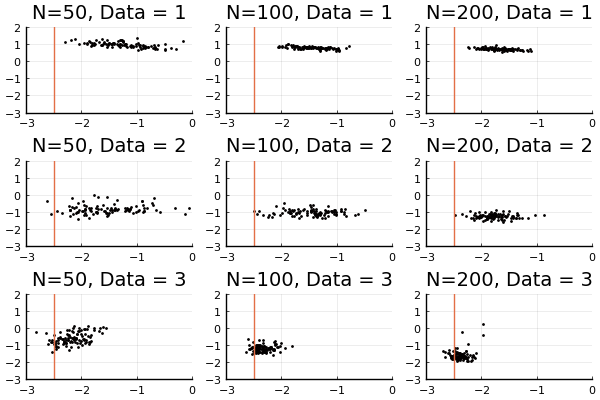

In [581]:

p_vec = []
for D = 1:1:3
    for N in [50, 100,200]
#         path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        path="/Users/amir/out/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(fetch_res3p(path)[:,1],fetch_res3p(path)[:,4], markersize =1,legends=false,color=:red, title="N=$(N), Data = $(D)" )
    #     S=50
    #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
        vline!([-2.5])
        hline!([3])
        push!(p_vec,pl )
    end
end 
# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (3,2), xlims=(-4,0), ylims=(1,11))
# , ylims=(-10,10), xlims=(-4,0))

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6],p_vec[7], p_vec[8], p_vec[9] , layout= (3,3), ylims=(-3,2), xlims=(-3,0))
# , xlims = (-5,5), ylims = (1,11),size = (1500,800))




# PDF of estimates 

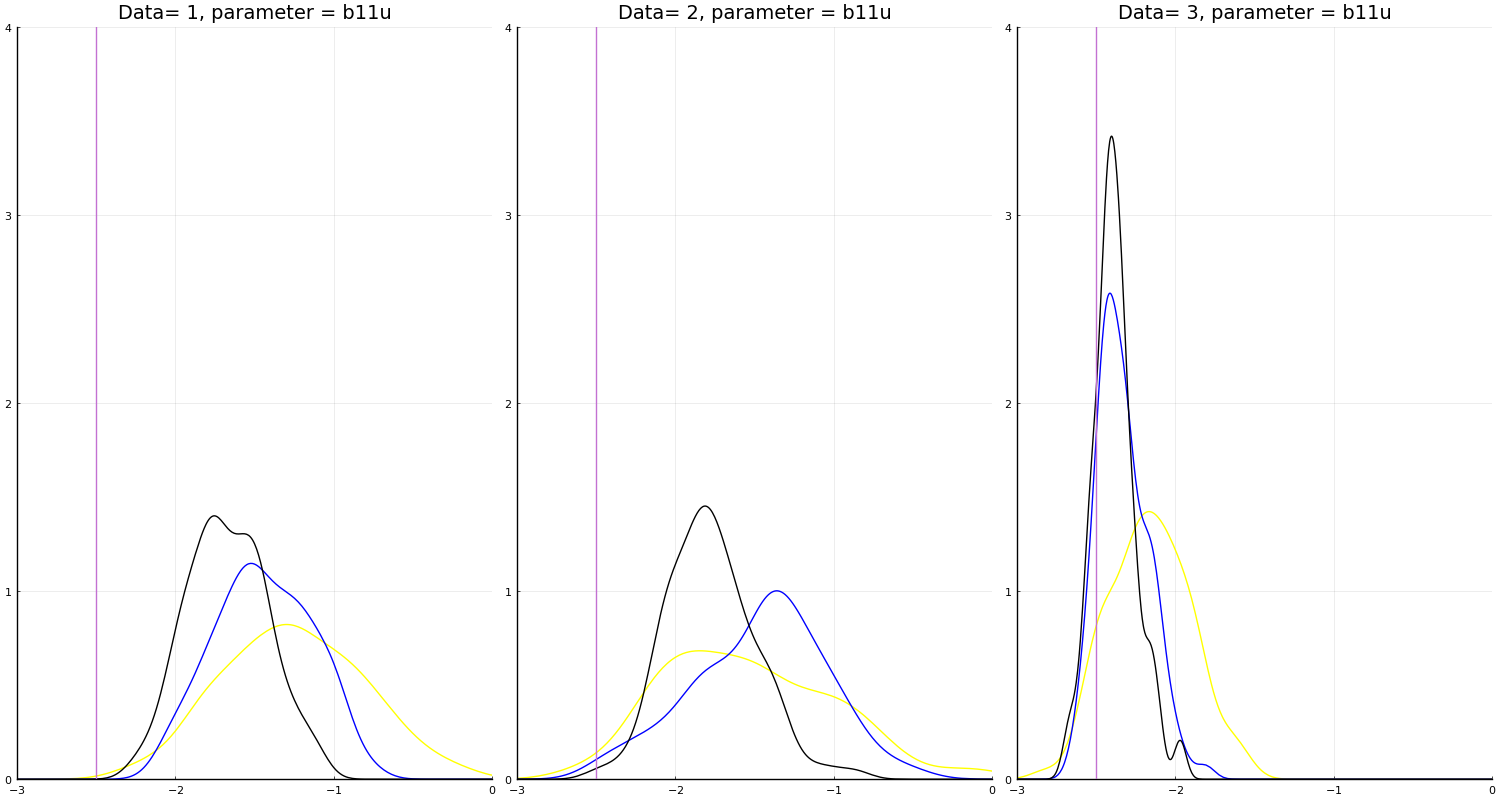

In [646]:

p_vec = []
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,1]), x), -5,1, color= :yellow, legends=false, title="Data= $(D), parameter = b11u")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,1]), x), -5,1, color= :blue, legends=false)
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,1]), x), -5,1, color= :black, legends=false)
        vline!([-2.5])
        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,4), xlims=(-3,0),size = (1500,800))
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




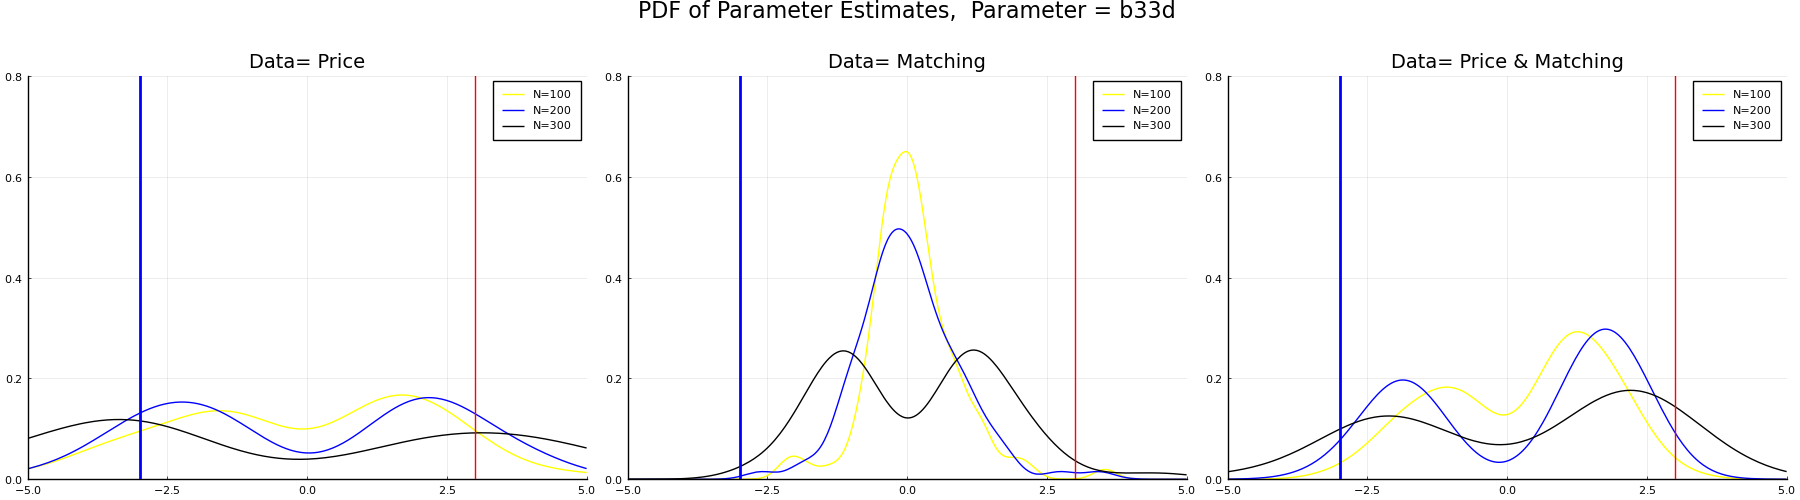

In [654]:

p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :yellow, label="N=100", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :blue,  label="N=200")
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :black, label="N=300")
        vline!([-3], linewidth = 2, color =:blue, label="")
        vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500),plot_title="PDF of Parameter Estimates,  Parameter = b33d")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




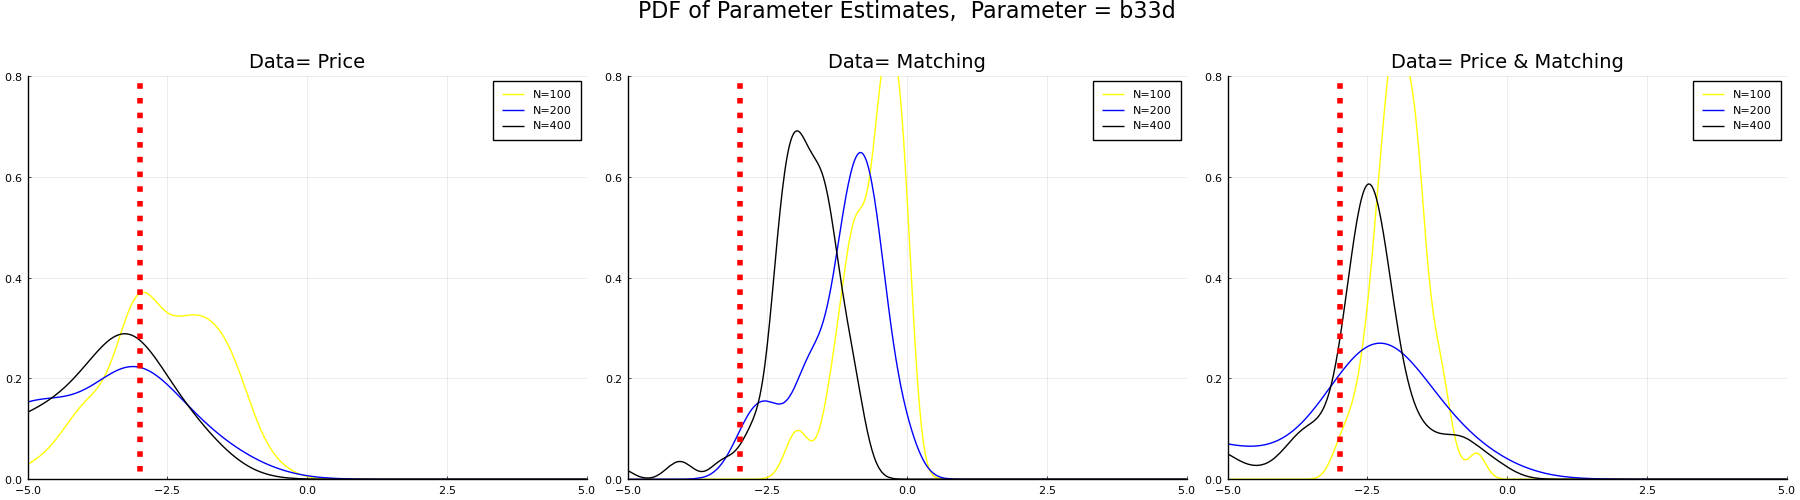

In [692]:
##### Fixed the sign of b33d 
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p_sign/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(-abs.(fetch_res3p(path)[:,2])), x), -5,5, color= :yellow, label="N=100", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p_sign/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(-abs.(fetch_res3p(path)[:,2])), x), -5,5, color= :blue,  label="N=200")
        path="/Users/amir/out/limited_data_3p_sign/est_400_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(-abs.(fetch_res3p(path)[:,2])), x), -5,5, color= :black, label="N=400")
        vline!([-3],  linestyle=:dot, linewidth = 4, color =:red, label="")
#         vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

# plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
plot(p_vec[1], p_vec[2],p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




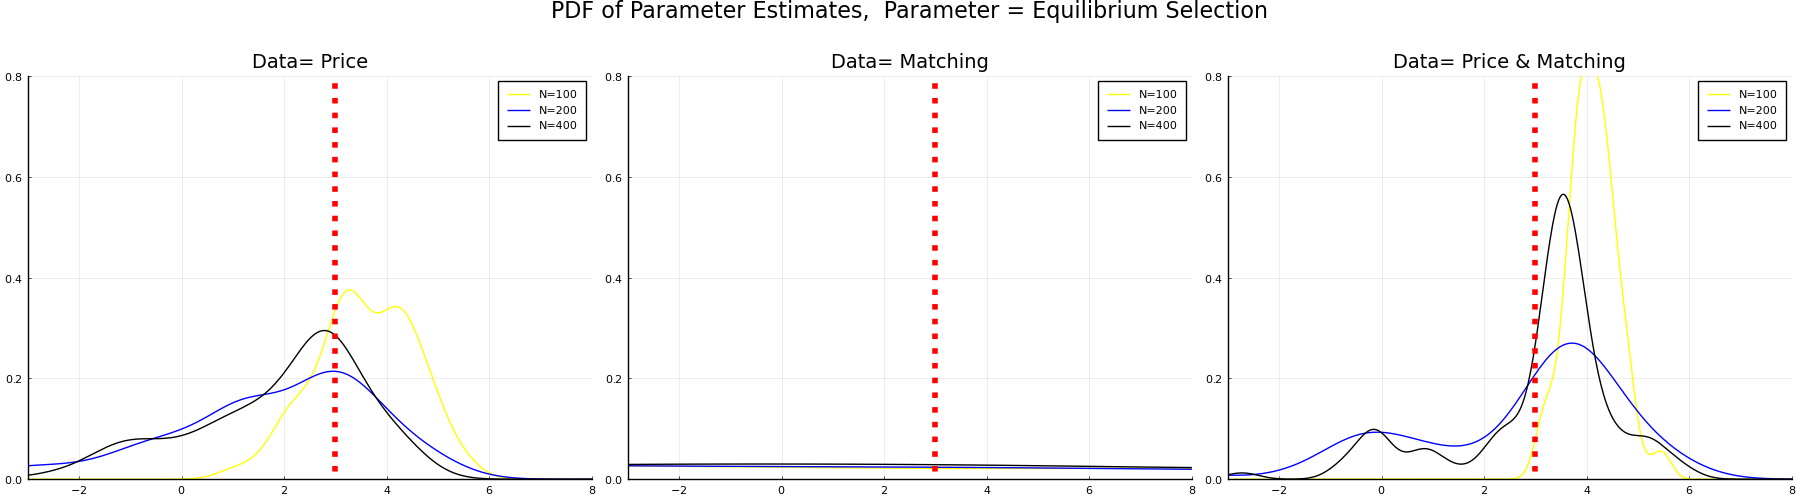

In [698]:
##### Fixed the sign of b33d, pdf for estimates of the selection rule
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p_sign/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde((fetch_res3p(path)[:,3])), x), -5,8, color= :yellow, label="N=100", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p_sign/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde((fetch_res3p(path)[:,3])), x), -5,8, color= :blue,  label="N=200")
        path="/Users/amir/out/limited_data_3p_sign/est_400_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde((fetch_res3p(path)[:,3])), x), -5,8, color= :black, label="N=400")
        vline!([3.], linestyle=:dot, linewidth = 4, color =:red, label="")
#         vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-3,8),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = Equilibrium Selection")

# plot(p_vec[1], p_vec[2], layout= (1,2), ylims=(0,.8), xlims=(-5,8),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




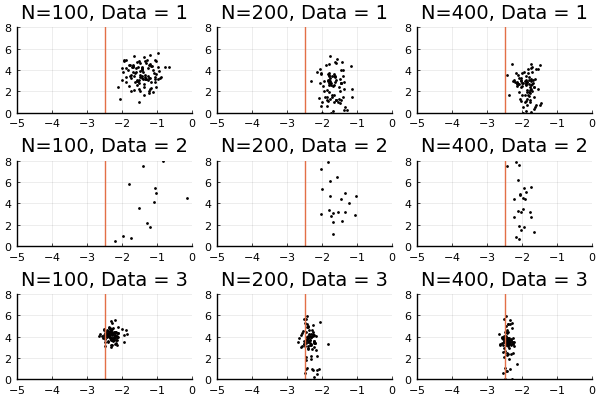

In [701]:

p_vec = []
for D = 1:1:3
    for N in [100, 200,400]
#         path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        path="/Users/amir/out/limited_data_3p_sign/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(-abs.(fetch_res3p(path)[:,1]),fetch_res3p(path)[:,3], markersize =1,legends=false,color=:red, title="N=$(N), Data = $(D)" )
        vline!([-2.5])
#         hline!([3])
        push!(p_vec,pl )
    end
end 
# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (3,2), xlims=(-4,0), ylims=(1,11))
# , ylims=(-10,10), xlims=(-4,0))

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6],p_vec[7], p_vec[8], p_vec[9] , layout= (3,3), ylims=(0,8), xlims=(-5,0))
# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (3,2),  ylims=(-20,20), xlims=(-20,0))

# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (2,3), ylims=(-3,2), xlims=(-3,0))
# , xlims = (-5,5), ylims = (1,11),size = (1500,800))




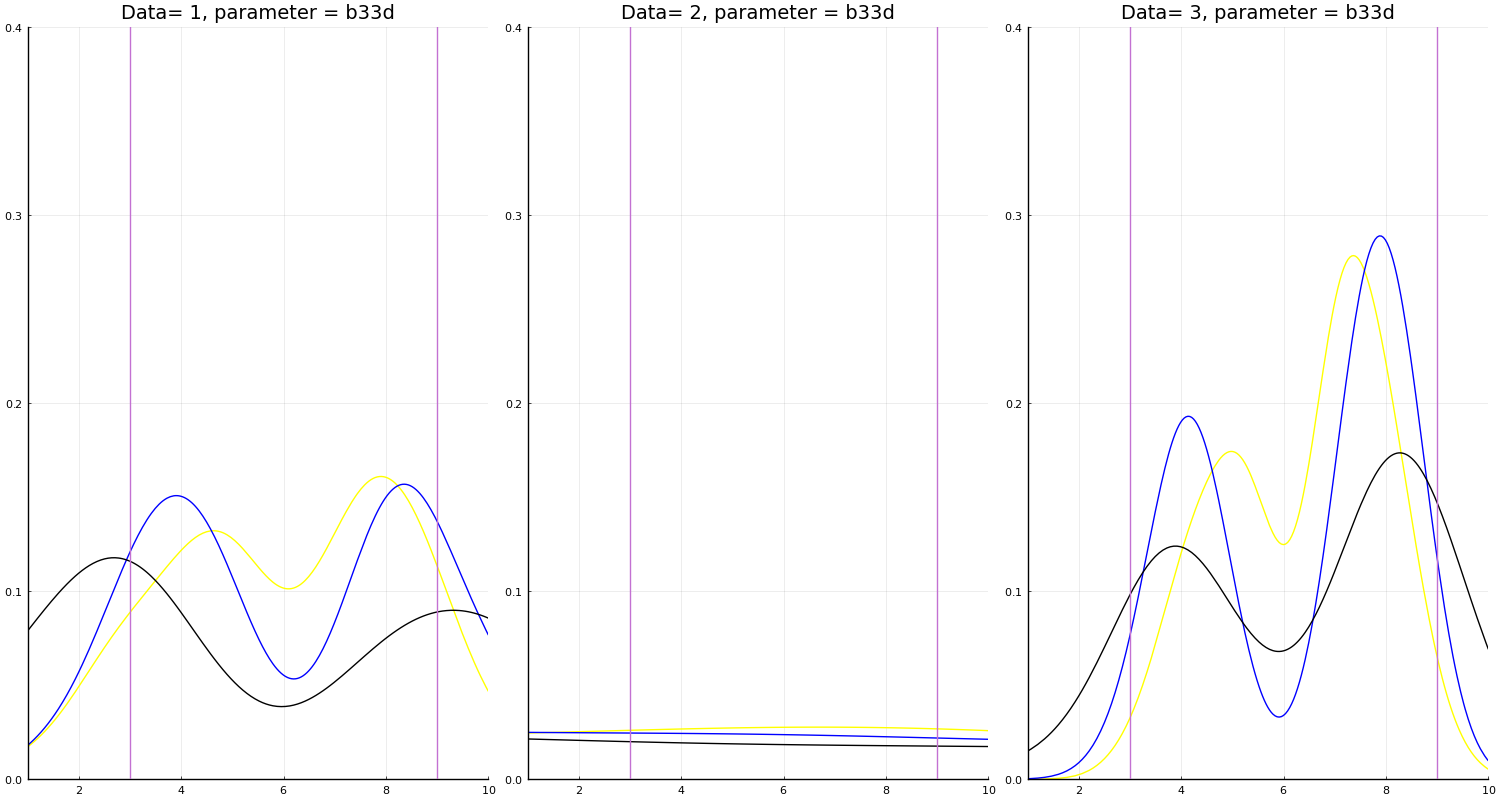

In [604]:

p_vec = []
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,3]), x), 1,10, color= :yellow, legends=false, title="Data= $(D), parameter = b33d")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,3]), x), 1,10, color= :blue, legends=false)
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,3]), x), 1,10, color= :black, legends=false)
        vline!([3, 9])
        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.4), xlims=(1,10),size = (1500,800))
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)


In [ ]:
#
p_vec = []
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :yellow, legends=false, title="Data= $(D), parameter = b33d")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :blue, legends=false)
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :black, legends=false)
        vline!([-3, 3])
        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,1), xlims=(-5,5),size = (1500,800))
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)


In [715]:
res = BSON.load("/Users/amir/out/10p-tst/est_100_sim_50_dmode_3_bw_1.0.bson")

Dict{Any, Any} with 1 entry:
  "beta_hat" => Any[[-4.50515 7.99367 … 1.37359 -0.654393], [-5.52461 6.35871 ……

In [716]:
est = reduce(vcat, res["beta_hat"])

100×11 Matrix{Float64}:
 -4.50515    7.99367    1.73038   …  -5.97857   1.37359   -0.654393
 -5.52461    6.35871    2.70459      -2.58413   6.3531    -0.754153
  0.0536918  4.09972   -2.23718      -2.24779   4.4936    -1.1698
 -2.32011    4.00411    0.495509     -6.62082   2.20908   -0.443449
 -3.98724    5.83686    2.50496      -3.45197   4.6429    -0.492448
 -1.7894     3.62285   -0.446161  …  -3.71842   4.35662   -0.89066
 -1.76875    2.44233   -0.407776     -4.37923   2.235     -1.05113
 -1.80175    3.3849    -1.73099      -5.96872   6.25187   -0.552295
 -2.25061    1.49522   -0.844867     -4.11071   3.26099   -0.747379
 -3.41156    4.90868    0.475626     -3.30326   5.64064   -1.22421
 -5.98614    7.51951    1.92821   …  -3.15228   7.06492   -0.607687
 -0.549058   0.360337  -1.85694      -2.59049   5.43881   -0.747162
 -4.18783    9.13216    1.95204      -5.08186   5.59981   -0.551479
  ⋮                               ⋱                        ⋮
 -0.602646   3.69428   -0.400652    

In [722]:
mean(est, dims=1)'

11×1 adjoint(::Matrix{Float64}) with eltype Float64:
 -2.9857964262257544
  4.981170617479503
  0.7128802961130893
 -4.882164738330106
  1.8294746774568187
  4.040551017625036
  4.400299779860734
  3.7024660438072403
 -4.678984300339385
  4.348966202388274
 -0.6697050487316288